Voy a seguir un tutorial de pytorch:
https://www.youtube.com/watch?v=V_xro1bcAuA&t=2598s 

In [1]:
import torch
from torch import nn # neural networks

In [2]:
from matplotlib import pyplot as plt

### Primer experimento con ML

In [3]:
## Acá vamos a generar datos

### parámetros

weight = 0.7
bias = 0.3

### tensores

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # como si fuese un linspace de 0 a 1 con step de 0.02
# unsqueeze es para cambiar la forma del tensor
y = weight * X + bias


In [4]:
## Ahora dividir en entrenamiento y testeo
## También se puede hacer con una función de sklearn
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
## Visualizar los datos

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='r', s=4, label='Test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label='Predictions')

    plt.legend(prop={'size':14});

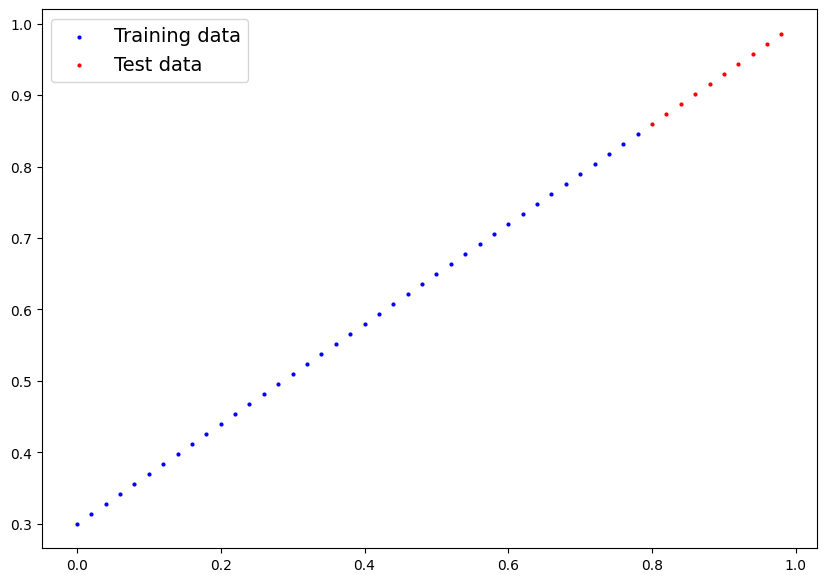

In [6]:
plot_predictions()

In [7]:
## Primer modelo

class LinearRegressionModel(nn.Module): # nn.Module es la superclase para todo
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                 dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # método base
    def forward(self, x: torch.Tensor) -> torch.Tensor: # siempre hay que sobreescribir este método
        return self.weights * x + self.bias

In [8]:
# semilla
torch.manual_seed(2985)

# instancia del modelo
model_0 = LinearRegressionModel()
model_0.state_dict()


OrderedDict([('weights', tensor([-0.3331])), ('bias', tensor([1.4107]))])

In [9]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.1443],
        [1.1376],
        [1.1310],
        [1.1243],
        [1.1176],
        [1.1110],
        [1.1043],
        [1.0976],
        [1.0910],
        [1.0843]])

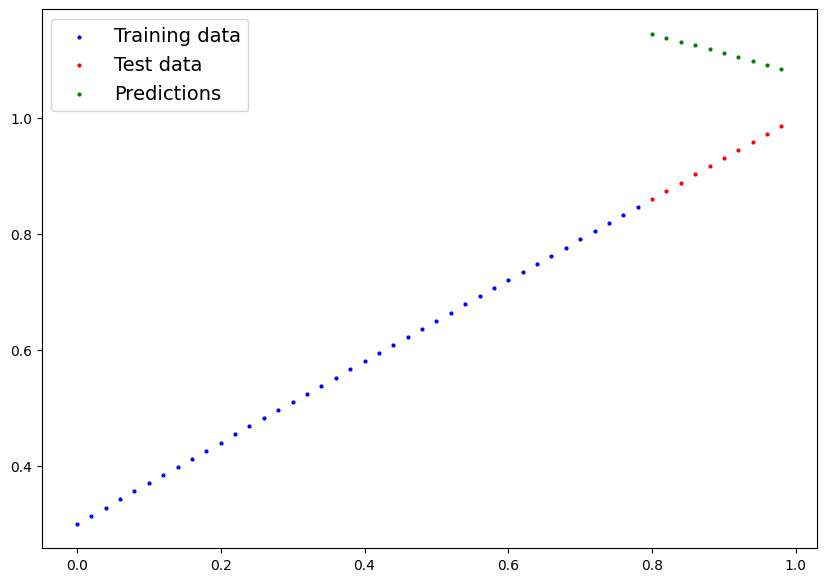

In [10]:
plot_predictions(predictions=y_preds)

In [19]:
## Entrenamiento

# Nos falta una función de pérdida y un optimizer
# Elegimos la métrica L1 y descenso de gradiente

loss_L1 = nn.L1Loss()

optim = torch.optim.SGD(params=model_0.parameters(),
                        lr = 0.01) # learning rate


In [ ]:
# loop de entrenamiento (y testeo)

epochs = 1000

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_L1(y_pred, y_train)
    
    optim.zero_grad()
    loss.backward()
    optim.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_L1(test_pred, y_test)
    if epoch % 100 == 0:
        print(test_loss)
        print(model_0.state_dict())
    

tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])
tensor(0.0076)
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.3077]))])


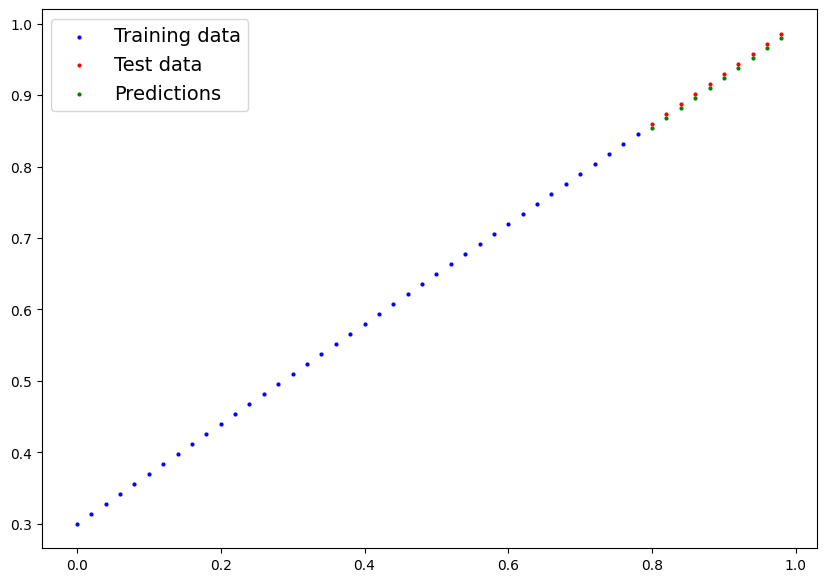

In [25]:

plot_predictions(predictions=test_pred)

In [ ]:
## guardar el modelo en un pickle o guardar el state_dict

from pathlib import Path

MODEL_PATH = Path("./models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

## en la documentación sale cómo guardar el modelo
## completo y no solo el state_dict.

In [30]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6959])), ('bias', tensor([0.2977]))])